# SAB prediction

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

output_folder = './validation_report/SAB'
today = pd.Timestamp.today().strftime('%Y-%m-%d')

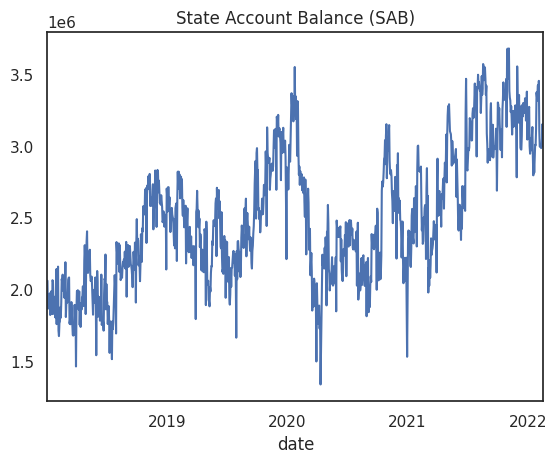

In [13]:
data = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')
data['SAB'].plot(title = 'State Account Balance (SAB)'); plt.show()

## Section 2: Model Definition

In [14]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastMSTL,
    StatsForecastAutoTBATS,
)

In [15]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "Seasonal_Naive": NaiveForecaster(sp = 20),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 20, max_p= 10, max_q=10),
    "AutoETS": StatsForecastAutoETS(season_length=20),
    "AutoCES": StatsForecastAutoCES(season_length=20),
    "AutoTheta": StatsForecastAutoTheta(season_length=20),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=20, 
                                        use_trend =True, use_boxcox=True),
    "LOESS": StatsForecastMSTL(season_length=20),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'SAB',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


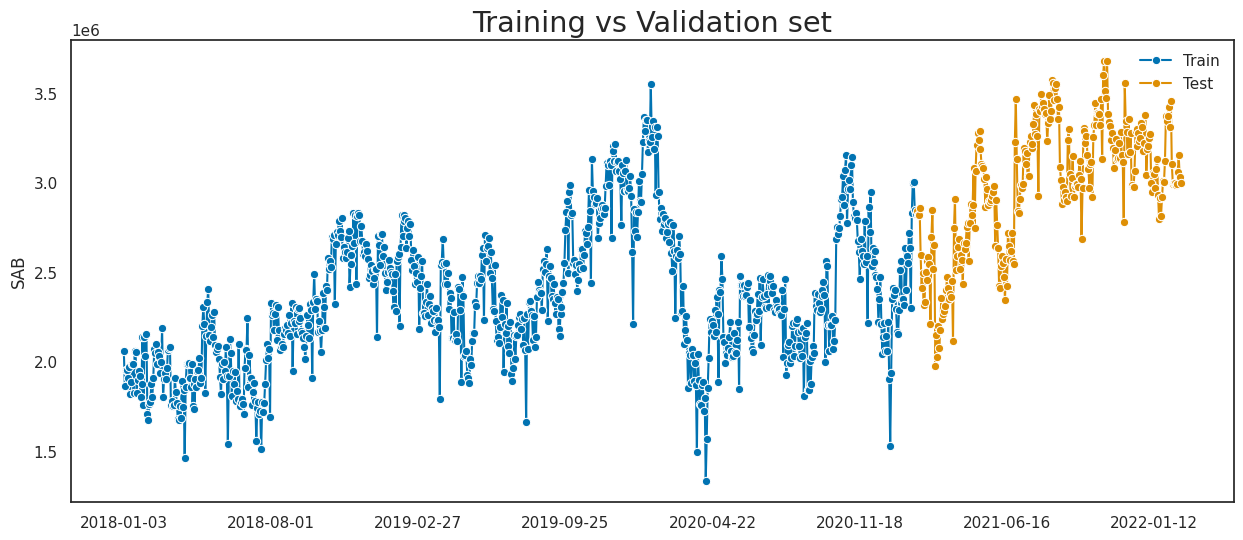

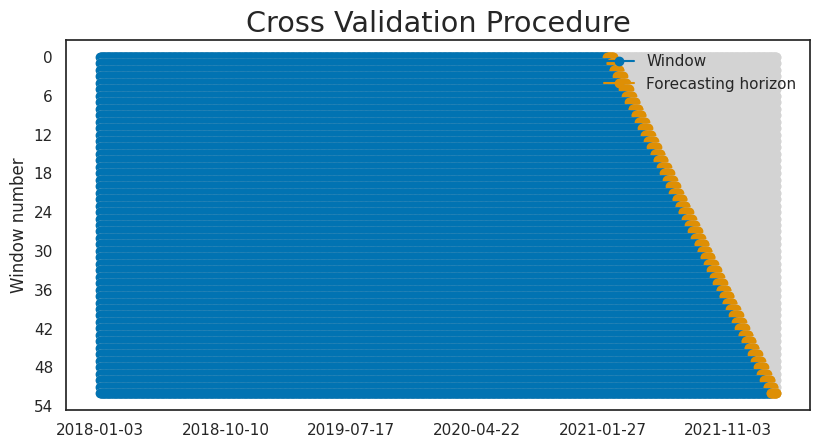

In [16]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')
plt.savefig(os.path.join(output_folder, f'train_test_{today}.png'), dpi=300)
model.plot_cv_procedure(xlabel='')
plt.savefig(os.path.join(output_folder, f'cross_validation_{today}.png'), dpi=300)

### Out-Of-sample Evaluation

In [17]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evaluation....


100%|██████████| 51/51 [00:00<00:00, 63.03it/s] 


Evaluation completed in: 1 seconds
Fitting the model Naive on the entire sample ...
Model fitted in 0 seconds

Start Seasonal_Naive forecaster evaluation....


100%|██████████| 51/51 [00:00<00:00, 64.79it/s] 


Evaluation completed in: 1 seconds
Fitting the model Seasonal_Naive on the entire sample ...
Model fitted in 0 seconds

Start AutoARIMA forecaster evaluation....


100%|██████████| 51/51 [00:00<00:00, 218.98it/s]


Evaluation completed in: 0 seconds
Fitting the model AutoARIMA on the entire sample ...
Model fitted in 0 seconds

Start AutoETS forecaster evaluation....


100%|██████████| 51/51 [00:04<00:00, 12.66it/s]


Evaluation completed in: 4 seconds
Fitting the model AutoETS on the entire sample ...
Model fitted in 1 seconds

Start AutoCES forecaster evaluation....


100%|██████████| 51/51 [00:00<00:00, 74.18it/s] 


Evaluation completed in: 1 seconds
Fitting the model AutoCES on the entire sample ...
Model fitted in 0 seconds

Start AutoTheta forecaster evaluation....


100%|██████████| 51/51 [00:01<00:00, 29.30it/s]


Evaluation completed in: 2 seconds
Fitting the model AutoTheta on the entire sample ...
Model fitted in 17 seconds

Start AutoTBATS forecaster evaluation....


100%|██████████| 51/51 [00:37<00:00,  1.36it/s]


Evaluation completed in: 44 seconds
Fitting the model AutoTBATS on the entire sample ...
Model fitted in 1 seconds

Start LOESS forecaster evaluation....


100%|██████████| 51/51 [00:00<00:00, 69.67it/s] 


Evaluation completed in: 1 seconds
Fitting the model LOESS on the entire sample ...
Model fitted in 0 seconds


In [18]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Number of Predictions,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
Naive,51,312,0.003563,0.032109,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,244631.521876,211224.141985,0.072736,-3.283466,201597.181298
AutoARIMA,51,312,0.124845,0.007342,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,253586.562484,220045.478091,0.076217,-3.338977,208234.200116
AutoETS,51,312,3.308925,0.007773,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,254007.589157,220421.398747,0.076218,-3.304741,208673.373147
AutoTheta,51,312,1.194517,0.005685,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,258584.943179,223884.420605,0.07719,-3.577243,212701.039503
AutoCES,51,312,0.330661,0.006027,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,258673.383173,224261.907502,0.077337,-3.522907,213268.925825
AutoTBATS,51,312,18.743367,0.031837,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,262966.740499,229770.97144,0.078552,-3.645137,218896.125393
LOESS,51,312,0.21127,0.014691,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,265210.249518,230483.830294,0.079586,-4.081425,220157.627577
Seasonal_Naive,51,312,0.005066,0.053691,807,1057,2021-02-05 00:00:00,2022-02-07 00:00:00,351413.832718,311949.520992,0.107384,-8.196315,303001.980916


horizon                             1              2              3   \
Naive          RMSE      205570.502256  223803.515027  238682.000303   
               MAE       147006.278846  166200.551282  183937.314103   
               MAPE           0.050691       0.057465       0.063315   
               R2             0.679981       0.618317       0.556811   
               MedianAE  101697.000000  122425.000000  148244.500000   
Seasonal_Naive RMSE      383688.287026  378482.182378  376381.407810   
               MAE       319864.820513  316151.310897  314852.435897   
               MAPE           0.110508       0.108880       0.108425   
               R2            -0.114837      -0.091590      -0.102062   
               MedianAE  297024.500000  296285.000000  297024.500000   
AutoARIMA      RMSE      224147.262224  237706.435617  251908.225054   
               MAE       172466.714206  186155.173338  197789.903927   
               MAPE           0.060105       0.064629       0.068615   
               R2             0.619529       0.569423       0.506333   
               MedianAE  132875.821219  148876.750773  170747.978256   
AutoETS        RMSE      224783.894327  238385.545681  252419.644892   
               MAE       172614.801536  186438.806468  198238.153977   
               MAPE           0.060107       0.064661       0.068691   
               R2             0.617365       0.566959       0.504326   
               MedianAE  131665.481849  150073.474125  168666.310427   
AutoCES        RMSE      226566.794532  239767.318297  255724.557783   
               MAE       175185.530284  188494.172261  202284.608523   
               MAPE           0.060858       0.065291       0.070060   
               R2             0.611271       0.561925       0.491262   
               MedianAE  146284.182861  160756.999023  168661.461914   
AutoTheta      RMSE      226757.691788  238807.598358  255567.294548   
               MAE       176097.501588  188377.488736  202714.868644   
               MAPE           0.061062       0.065161       0.070093   
               R2             0.610616       0.565425       0.491887   
               MedianAE  146247.993920  165228.638172  167801.639418   
AutoTBATS      RMSE      227084.215787  242860.851933  258311.509101   
               MAE       175208.005011  191020.282956  204310.775080   
               MAPE           0.060765       0.065880       0.070318   
               R2             0.609494       0.550548       0.480917   
               MedianAE  136032.733341  154781.036823  168435.641207   
LOESS          RMSE      235533.172865  245519.325233  256483.259045   
               MAE       186229.024591  196503.774967  205536.631464   
               MAPE           0.064774       0.067974       0.071061   
               R2             0.579894       0.540654       0.488238   
               MedianAE  155073.042301  165479.562863  176176.780024   

horizon                             4              5              6   \
Naive          RMSE      252708.486849  263189.632132  277526.688695   
               MAE       198321.057692  212282.451923  226628.833333   
               MAPE           0.068223       0.073251       0.078229   
               R2             0.512163       0.461538       0.415370   
               MedianAE  166597.000000  175065.500000  198146.500000   
Seasonal_Naive RMSE      374192.817282  370384.626479  377617.021193   
               MAE       312419.830128  308154.205128  313149.464744   
               MAPE           0.107528       0.106095       0.108050   
               R2            -0.069612      -0.066409      -0.082368   
               MedianAE  290074.000000  290074.000000  288479.000000   
AutoARIMA      RMSE      259145.968671  270633.235346  281897.322589   
               MAE       207948.055309  218685.150646  229679.583671   
               MAPE           0.072221       0.076039       0.080070   
               R2             0.486992 

In [19]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,Naive,Naive,Naive,Naive,Naive,Naive,Naive,Naive,Naive,Naive
Best_2,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA,AutoETS,AutoETS,AutoETS,AutoETS
Best_3,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS,AutoETS,AutoARIMA,AutoARIMA,AutoARIMA,AutoARIMA
Best_4,AutoTBATS,AutoTheta,AutoCES,AutoCES,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoCES,AutoTheta
Best_5,AutoCES,AutoCES,AutoTheta,AutoTBATS,AutoCES,AutoCES,AutoCES,AutoCES,AutoTheta,AutoCES
Best_6,AutoTheta,AutoTBATS,AutoTBATS,AutoTheta,AutoTBATS,AutoTBATS,AutoTBATS,AutoTBATS,LOESS,AutoTBATS
Best_7,LOESS,LOESS,LOESS,LOESS,LOESS,LOESS,LOESS,LOESS,AutoTBATS,LOESS
Best_8,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive,Seasonal_Naive


,Naive,Seasonal_Naive,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,LOESS,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,,,,
1,0.050691,0.110508,0.060105,0.060107,0.060858,0.061062,0.060765,0.064774,0.050691,0.050691,0.055399,0.055398,0.066109
2,0.057465,0.108880,0.064629,0.064661,0.065291,0.065161,0.065880,0.067974,0.057465,0.057465,0.061063,0.061047,0.069993
3,0.063315,0.108425,0.068615,0.068691,0.070060,0.070093,0.070318,0.071061,0.063315,0.063315,0.066003,0.065965,0.073822
4,0.068223,0.107528,0.072221,0.072245,0.073838,0.074287,0.074248,0.075676,0.068223,0.068223,0.070234,0.070222,0.077283
5,0.073251,0.106095,0.076039,0.076058,0.077913,0.077583,0.078722,0.080590,0.073251,0.073251,0.074654,0.074645,0.080781
6,0.078229,0.108050,0.080070,0.080099,0.080980,0.080673,0.082670,0.083730,0.078229,0.078229,0.079164,0.079149,0.084313
7,0.081314,0.106857,0.082425,0.082397,0.083114,0.082512,0.085543,0.085885,0.081314,0.081314,0.081856,0.081856,0.086256
8,0.083029,0.107298,0.084548,0.084428,0.085339,0.084938,0.087428,0.087594,0.083029,0.083029,0.083728,0.083728,0.088075
9,0.083741,0.107253,0.085803,0.085589,0.086725,0.086921,0.088669,0.088598,0.083741,0.083741,0.084665,0.084665,0.089162


In [20]:
# export all the result in excel 
with pd.ExcelWriter(os.path.join(output_folder, f'Cross_validation_result_{today}.xlsx')) as writer:
    summary_results.to_excel(writer, sheet_name='summary_results', index=True)
    summary_horizon.to_excel(writer, sheet_name='summary_horizon', index=True)
    rank.to_excel(writer, sheet_name='rank', index=True)
    score.to_excel(writer, sheet_name='score', index=True)

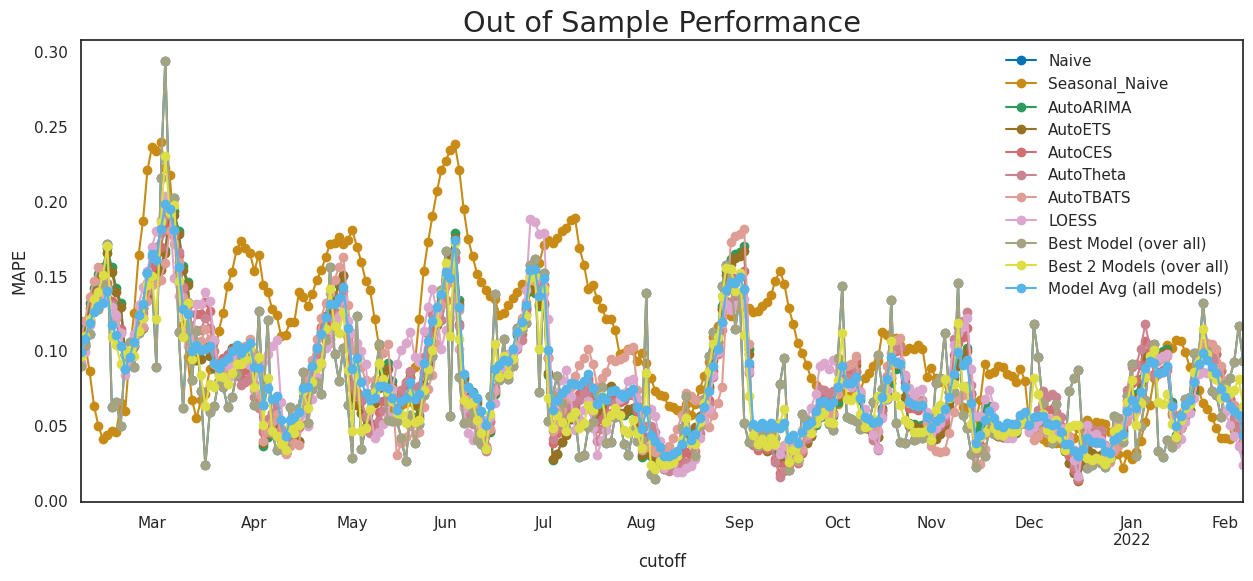

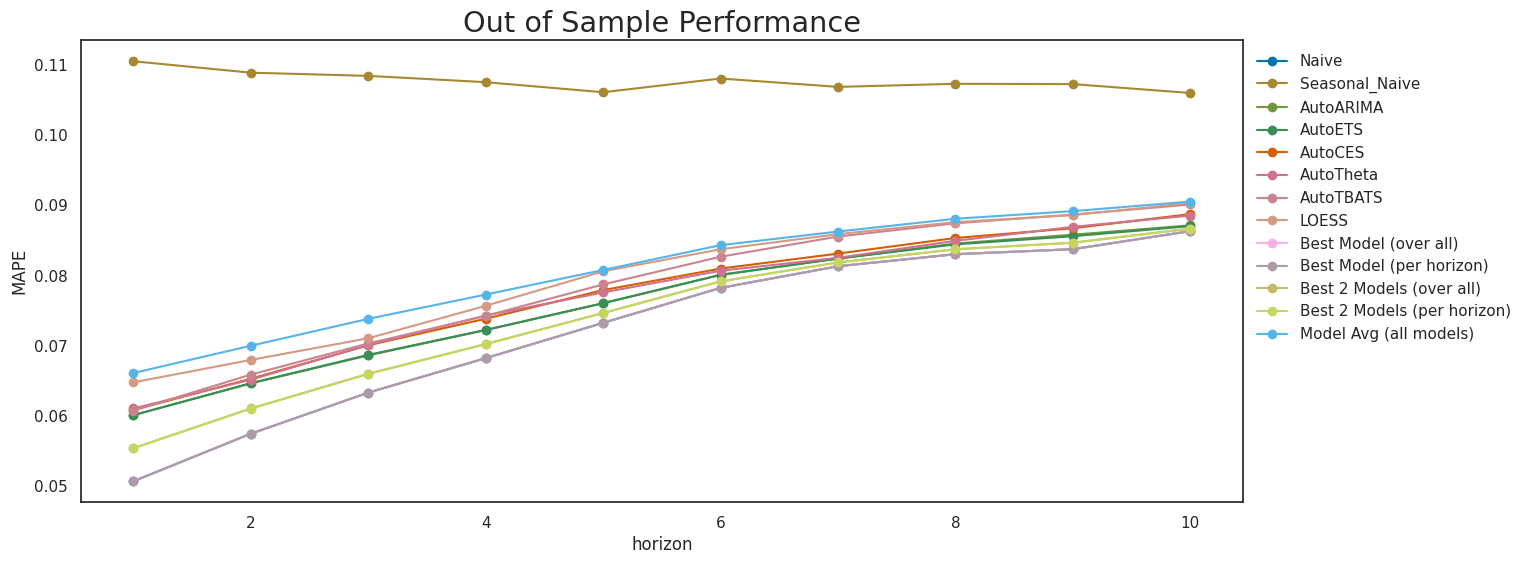

In [21]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')#, model_subset=subset)
plt.savefig(os.path.join(output_folder, f'model_compare_per_cutoff_{today}.png'), dpi=300, bbox_inches='tight')
model.plot_model_compare(score ='MAPE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])
plt.savefig(os.path.join(output_folder, f'model_compare_per_horizon_{today}.png'), dpi=300, bbox_inches='tight')

In [22]:
y_pred, y_pred_ints, preds, pred_ints = model.predict(mode='best_horizon', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = preds,
                     y_pred_interval = y_pred_ints)  

AttributeError: 'NoneType' object has no attribute 'groupby'

In [ ]:
path = '../model_output/SAB_forecast.pkl'
model.save(path)